### Flutter Calculations

This document is a TEMPORARY repository of flutter calculations and other math relevant to determining the failure critera of the LV3 fin assembly.

[Here is the source](http://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19930085030.pdf) for this equation. (page 14, equation 18)

$$
V_{f}=a \sqrt{\frac{G_{E}}{K_{1}*K_{2}*K_{3}}}\\
K_{1}=\frac{39.3(AR^3)}{(\frac{t}{c})^3 (AR+2)}\\
K_{2}=\frac{\lambda+1}{2}\\
K_{3}=\frac{p}{p_{o}}\\
$$

$V_{f}, $ Flutter Velocity (m/s)

$a, $ Speed of Sound (m/s)

$G_{E}, $ Effective Shear Modulus (Pa)

$AR, $ Aspect Ratio

$t, $ Fin Thickness (m)

$c, $ Fin Chord (m)

$\lambda, $ Taper Ratio (Tip Chord to Root Chord)

$p, $ Air Pressure (Pa)

$p_{o}, $ Air Pressure, Sea Level (Pa)

In [1]:
import math as m
import numpy as np
import matplotlib
import matplotlib.pyplot as plot
import pylab
from matplotlib import rc
%matplotlib inline
% config InlineBackend.figure_formats=['svg']

In [2]:
## Try ZAERO
## Fin Geometry
## Note: Shorten and Thicken:
##       From t = 0.25 in. to 0.4 in.

Cr = 18*25.4/1e3# Chord, root (m)
Ct = 5*25.4/1e3# Chord, tip (m)
W  = 6.4*25.4/1e3# Semispan (m)
MAC = (Cr+Ct)/2# Chord, mean aero (m)
S = W*MAC # Fin area (m^2)
AR = W/MAC # Aspect ratio
La = Ct/Cr # Taper ratio
# t = 0.25 # Fin thickness (in.)
thick= 0.25

In [3]:
## Atmospheric Parameters

t = np.linspace(0, 200, 100000)
x = np.arange(100000) # Altitude array (m)
def atmo(x):
    if np.all(x < 11000):
        T = 15.04-0.0065*x
        P = 101.3*((T+273.1)/288.1)**5.26
    elif np.all(11000 <= x) & np.all(x < 25000):
        T = -56.46
        P = 22.65*m.exp(1.73-0.00016*x) 
    else:
        T = -131.2+0.003*x
        P = 2.488*((T+273.1)/216.6)**(-11.4)

    rho = P/(0.29*(T+273.1)) # Density, ambient air (kg/m^3)
    Pa  = P*1000             # Pressure, ambient air (Pa)
    Ta  = T+273.1            # Temperature, ambient air (K)
    a   = 20.05*m.sqrt(Ta)     # Speed of sound (m/s)
    return Pa, rho, Ta, a

# def atmo(x):
#    return [atmo_helper(xi) for xi in x] # give atmo_helper() the x values one-at-a-time

In [27]:
a = [atmo(xi)[3] for xi in x] # Speed of sound (m/s)
P = [atmo(xi)[0] for xi in x] # Pressure at altitude x (Pa)
Po = atmo(0)[0] # Sea level pressure (Pa)

In [11]:
## Material Properties

GE = 25.5 # Effective Shear Modulus

## Flutter
## Influences: Stiffness
##             Mach
##             Mass
## Guidelines: 15% FS for velocity V/Vf
##             32% FS for pressure Q/Qf

In [63]:
K1 = (39.3*AR**3)/((AR+2)*(thick/MAC)**3)
K2 = (La+1)/2
K3 = [Pi/Po for Pi in P]
Vf = [a[i]*m.sqrt(GE/(K1*K2*K3[i])) for i in range(0,len(a))] # Flutter velocity (m/s)

#def velo(t):
#    if np.all(t < number):

#Qf = # Flutter dynamic pressure (Pa)

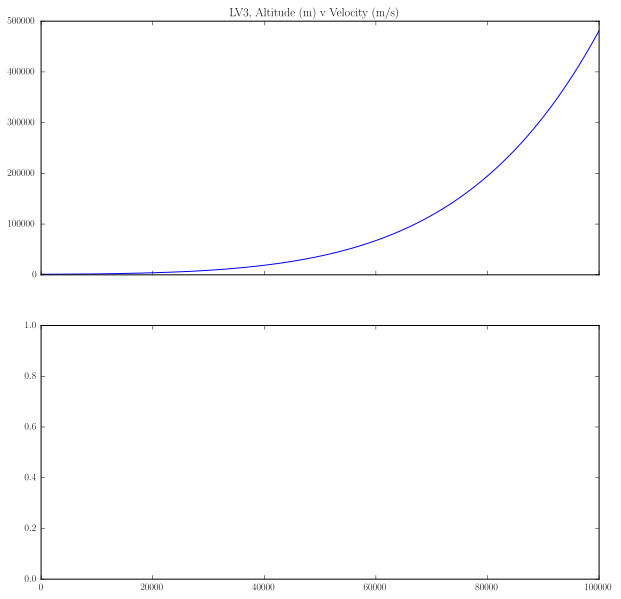

In [65]:
print('\n')

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
f, (ax1, ax2) = plot.subplots(2, sharex=True)
ax1.plot(x, Vf)
ax1.yaxis.major.locator.set_params(nbins=6)
ax1.set_title('LV3, Altitude (m) v Flutter Velocity (m/s)')
# ax1.plot(x, V)
ax1.yaxis.major.locator.set_params(nbins=6)
ax1.set_title('LV3, Altitude (m) v Velocity (m/s)')